## FOR COMP90024 ASSIGNMENT 2
### BY TEAM 45:
- William Chen 1400081
- Petr Andreev 1375858
- Rafsan Al Mamun 1407776
- Ojaswi Dheer 1447227

In [16]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
with open('../data/historic_tweet_sentiments.json', 'r') as f:
    data = json.load(f)

entries = data['entries']

df = pd.DataFrame(entries)
df.sort_values(by=['year', 'month'])

,day,month,total_sentiment,total_tweets,year
0,21,6,11105.178827,206675,2021
1,22,6,11880.141233,219689,2021
2,23,6,12305.217217,224419,2021
3,24,6,11026.589371,210385,2021
4,29,6,13369.864219,246481,2021
...,...,...,...,...,...
333,31,5,18752.189058,292252,2022
334,1,6,18332.895340,293985,2022
335,2,6,16832.835328,284913,2022
336,3,6,16718.695386,278711,2022


In [18]:
mean_sentiment_by_month = df.groupby('month')['total_sentiment'].mean().reset_index()
mean_sentiment_by_month

,month,total_sentiment
0,1,16319.981538
1,2,16536.963409
2,3,15513.795076
3,4,17209.459236
4,5,17537.890859
5,6,11790.280864
6,7,12866.532209
7,8,14222.640884
8,9,13752.161716
9,10,14412.610041


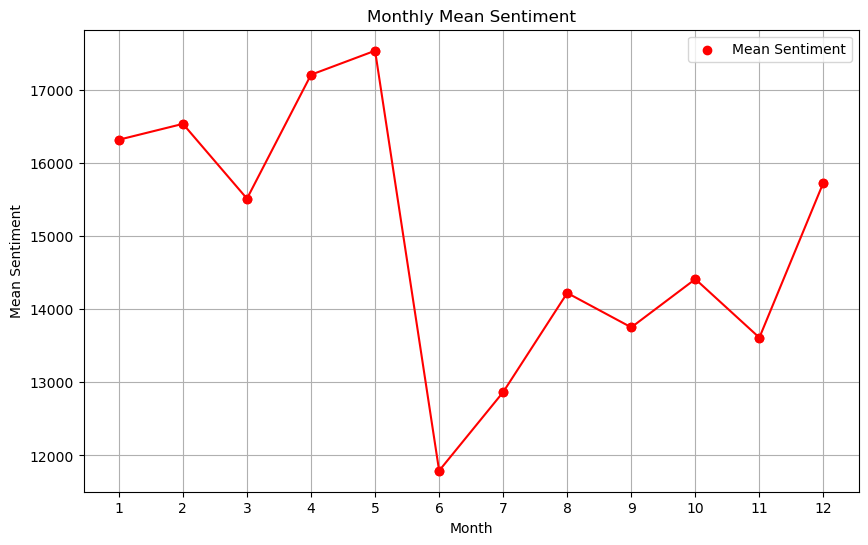

In [19]:
# Plot scatter plot with line
plt.figure(figsize=(10, 6))
plt.scatter(mean_sentiment_by_month['month'], mean_sentiment_by_month['total_sentiment'], color='red', label='Mean Sentiment')
plt.plot(mean_sentiment_by_month['month'], mean_sentiment_by_month['total_sentiment'], color='red', linestyle='-', marker='o')
plt.title('Monthly Mean Sentiment')
plt.xlabel('Month')
plt.ylabel('Mean Sentiment')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()

## Sentiment Analysis


In [20]:
def process_city_data_for_rainfall(file_path, city_name):
    city_df = pd.read_csv(file_path)

    # Filter rows for years 2021 and 2022
    city_df = city_df[(city_df['Year'] == 2021) | (city_df['Year'] == 2022)]

    # Drop the first and last column
    city_df = city_df.iloc[:, 1:-1]

    # Calculate mean rainfall
    # Convert 'Mean Rainfall (mm)' column to numeric
    city_df['Total Rainfall (mm)'] = pd.to_numeric(city_df['Monthly Precipitation Total (millimetres)'], errors='coerce')
    # city_df['Total Rainfall (mm)'] = city_df['Mean Rainfall (mm)']

    # Drop the 'Monthly Precipitation Total (millimetres)' column
    city_df.drop(columns='Monthly Precipitation Total (millimetres)', inplace=True)

    # Replace 'Station number' values with city name
    city_df['Station'] = city_name
    city_df.drop(columns='Station number', inplace=True)

    # Group by 'Month' and 'Station number' and calculate mean rainfall
    city_df = city_df.groupby(['Month', 'Station'])['Total Rainfall (mm)'].mean().reset_index()

    return city_df

def get_rainfall_data():
    cities = {
        'Adelaide': '../data/bom_historic_data/rainfall_cities/Adelaide.csv',
        'Brisbane': '../data/bom_historic_data/rainfall_cities/Brisbane.csv',
        'Canberra': '../data/bom_historic_data/rainfall_cities/Canberra.csv',
        'Darwin': '../data/bom_historic_data/rainfall_cities/Darwin.csv',
        'Melbourne': '../data/bom_historic_data/rainfall_cities/Melbourne.csv',
        'Perth': '../data/bom_historic_data/rainfall_cities/Perth.csv',
        'Sydney': '../data/bom_historic_data/rainfall_cities/Sydney.csv',
        'Tasmania': '../data/bom_historic_data/rainfall_cities/Tasmania.csv'
    }

    # Process data for each city
    city_data_list = []
    for city, file_path in cities.items():
        city_data = process_city_data_for_rainfall(file_path, city)
        city_data_list.append(city_data)

    # Concatenate data for all cities to get an average of Australia 
    Rainfall_data = pd.concat(city_data_list, ignore_index=True)
    Rainfall_data = Rainfall_data.groupby(['Month'])['Total Rainfall (mm)'].mean().reset_index()
    
    return Rainfall_data


In [21]:
def process_city_data_for_temp(file_path, city_name):
    city_df = pd.read_csv(file_path)

    # Filter rows for years 2021 and 2022
    city_df = city_df[(city_df['Year'] == 2021) | (city_df['Year'] == 2022)]

    # Drop the first and last column
    city_df = city_df.iloc[:, 1:-1]

    # Replace 'Bureau of Meteorology station number' values with city name
    city_df['Station'] = city_name
    city_df.drop(columns='Bureau of Meteorology station number', inplace=True)

    # Convert 'Mean maximum temperature (°C)' column to numeric
    city_df['Mean maximum temperature (°C)'] = pd.to_numeric(city_df['Mean maximum temperature (°C)'], errors='coerce')

    # Group by 'Month' and 'Station number' and calculate mean rainfall
    city_df = city_df.groupby(['Month', 'Station'])['Mean maximum temperature (°C)'].mean().reset_index()

    return city_df

def get_temp_data():
    cities = {
        'Adelaide': '../data/bom_historic_data/temperature_cities/Adelaide.csv',
        'Brisbane': '../data/bom_historic_data/temperature_cities/Brisbane.csv',
        'Canberra': '../data/bom_historic_data/temperature_cities/Canberra.csv',
        'Darwin': '../data/bom_historic_data/temperature_cities/Darwin.csv',
        'Melbourne': '../data/bom_historic_data/temperature_cities/Melbourne.csv',
        'Perth': '../data/bom_historic_data/temperature_cities/Perth.csv',
        'Sydney': '../data/bom_historic_data/temperature_cities/Sydney.csv',
        'Tasmania': '../data/bom_historic_data/temperature_cities/Tasmania.csv'
    }

    # Process data for each city
    city_data_list = []
    for city, file_path in cities.items():
        city_data = process_city_data_for_temp(file_path, city)
        city_data_list.append(city_data)

    # Concatenate data for all cities to get an average of Australia 
    Temperature_data = pd.concat(city_data_list, ignore_index=True)
    Temperature_data = Temperature_data.groupby(['Month'])['Mean maximum temperature (°C)'].mean().reset_index()
    
    return Temperature_data


In [22]:
temp_data = get_temp_data()
temp_data

,Month,Mean maximum temperature (°C)
0,1,28.60000
1,2,27.63750
2,3,26.44375
3,4,24.24375
4,5,21.03125
5,6,18.38750
6,7,17.81250
7,8,19.61875
8,9,21.20625
9,10,22.75625


In [23]:
rain_data = get_rainfall_data()
rain_data

,Month,Total Rainfall (mm)
0,1,120.56250
1,2,126.70625
2,3,94.82500
3,4,56.31250
4,5,83.65000
5,6,55.31250
6,7,55.85000
7,8,59.57500
8,9,59.83125
9,10,109.50625


In [24]:
# Merge the two dataframes
df_merged = pd.merge(rain_data, temp_data, on=['Month'])

# Rename columns
df_merged.rename(columns={'Total Rainfall (mm)': 'Total Rainfall', 'Mean maximum temperature (°C)': 'Mean Max Temp'}, inplace=True)
df_merged



,Month,Total Rainfall,Mean Max Temp
0,1,120.56250,28.60000
1,2,126.70625,27.63750
2,3,94.82500,26.44375
3,4,56.31250,24.24375
4,5,83.65000,21.03125
5,6,55.31250,18.38750
6,7,55.85000,17.81250
7,8,59.57500,19.61875
8,9,59.83125,21.20625
9,10,109.50625,22.75625


In [25]:
australia_data = pd.merge(df_merged, mean_sentiment_by_month, left_on='Month', right_on='month',)
australia_data.drop('month', axis=1, inplace=True)
australia_data

,Month,Total Rainfall,Mean Max Temp,total_sentiment
0,1,120.56250,28.60000,16319.981538
1,2,126.70625,27.63750,16536.963409
2,3,94.82500,26.44375,15513.795076
3,4,56.31250,24.24375,17209.459236
4,5,83.65000,21.03125,17537.890859
5,6,55.31250,18.38750,11790.280864
6,7,55.85000,17.81250,12866.532209
7,8,59.57500,19.61875,14222.640884
8,9,59.83125,21.20625,13752.161716
9,10,109.50625,22.75625,14412.610041


In [26]:
correlation_rainfall = australia_data['total_sentiment'].corr(australia_data['Total Rainfall'])
correlation_temp = australia_data['total_sentiment'].corr(australia_data['Mean Max Temp'])
correlation_temp_rain = australia_data['Total Rainfall'].corr(australia_data['Mean Max Temp'])

print("Correlation between Total Rainfall and Mean Max Temp:", correlation_temp_rain)
print("Correlation between Total Sentiment and Total Rainfall:", correlation_rainfall)
print("Correlation between Total Sentiment and Mean Max Temp:", correlation_temp)


Correlation between Total Rainfall and Mean Max Temp: 0.7765547458104624
Correlation between Total Sentiment and Total Rainfall: 0.46689906162646316
Correlation between Total Sentiment and Mean Max Temp: 0.6352098169581458


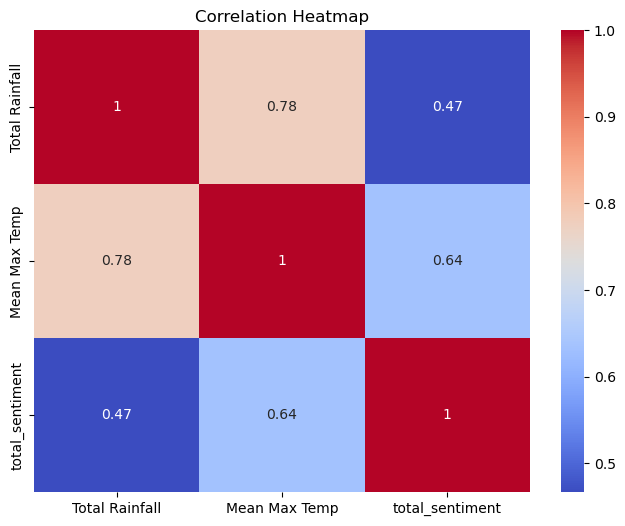

In [27]:


# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(australia_data.drop(columns='Month').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


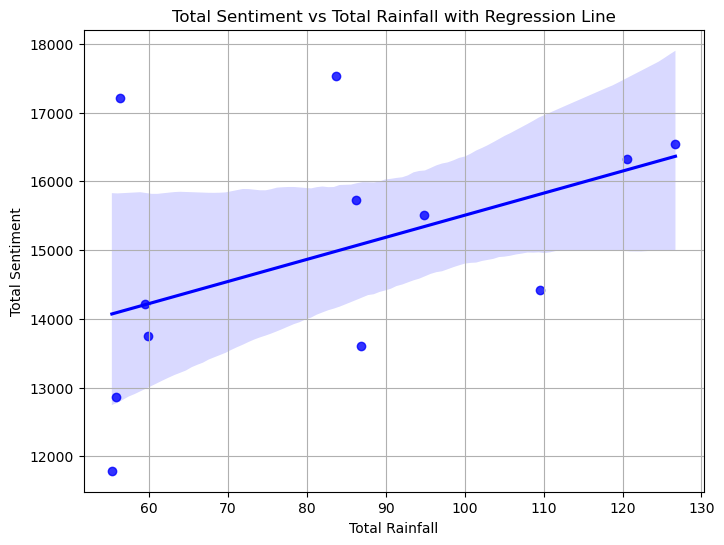

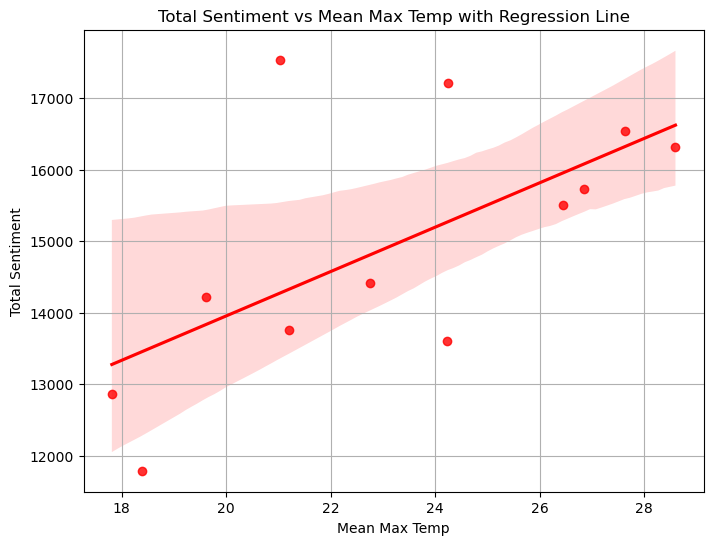

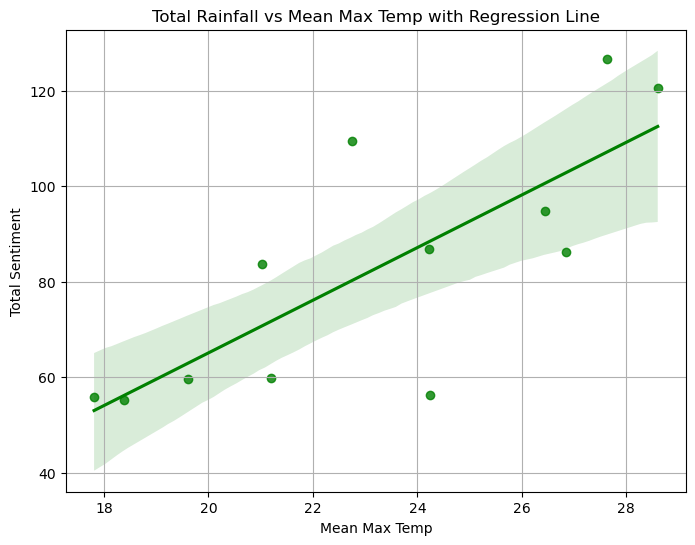

In [28]:
import seaborn as sns

# Scatter plot with regression line for Total Sentiment vs Mean Rainfall
plt.figure(figsize=(8, 6))
sns.regplot(x='Total Rainfall', y='total_sentiment', data=australia_data, color='blue')
plt.xlabel('Total Rainfall')
plt.ylabel('Total Sentiment')
plt.title('Total Sentiment vs Total Rainfall with Regression Line')
plt.grid(True)
plt.show()

# Scatter plot with regression line for Total Sentiment vs Mean Max Temp
plt.figure(figsize=(8, 6))
sns.regplot(x='Mean Max Temp', y='total_sentiment', data=australia_data, color='red')
plt.xlabel('Mean Max Temp')
plt.ylabel('Total Sentiment')
plt.title('Total Sentiment vs Mean Max Temp with Regression Line')
plt.grid(True)
plt.show()


# Scatter plot with regression line for Total Sentiment vs Mean Max Temp
plt.figure(figsize=(8, 6))
sns.regplot(x='Mean Max Temp', y='Total Rainfall', data=australia_data, color='green')
plt.xlabel('Mean Max Temp')
plt.ylabel('Total Sentiment')
plt.title('Total Rainfall vs Mean Max Temp with Regression Line')
plt.grid(True)
plt.show()


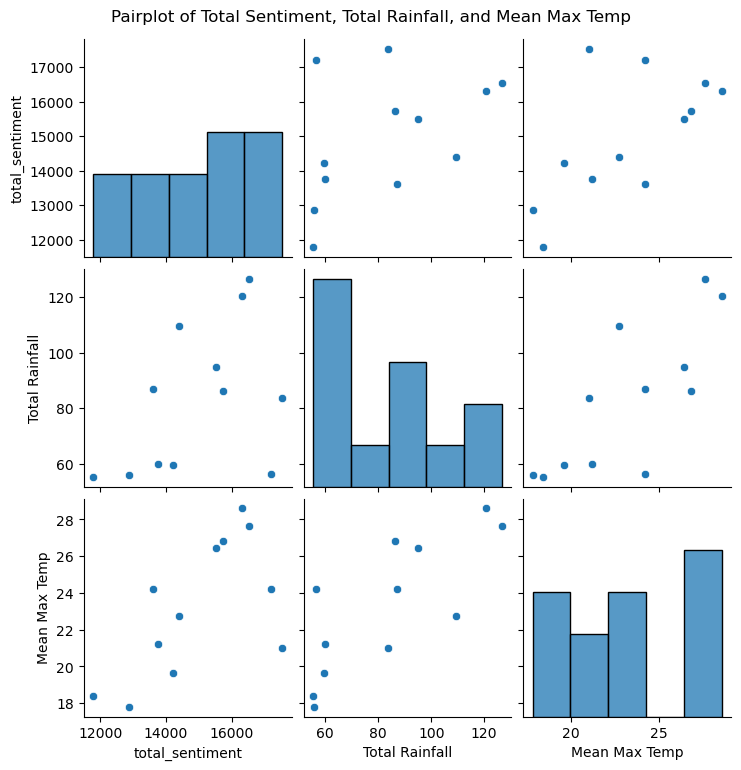

In [29]:

# Select columns for pairplot
columns = ['total_sentiment', 'Total Rainfall', 'Mean Max Temp']

# Create pairplot
sns.pairplot(australia_data[columns])
plt.suptitle('Pairplot of Total Sentiment, Total Rainfall, and Mean Max Temp', y=1.02)
plt.show()


In [30]:
# # Scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(australia_data['Month'], australia_data['Mean Rainfall'], color='blue', label='Mean Rainfall')
# plt.scatter(australia_data['Month'], australia_data['Mean Max Temp'], color='red', label='Mean Max Temp')
# plt.scatter(australia_data['Month'], australia_data['total_sentiment'], color='green', label='Total Sentiment')
# plt.xlabel('Month')
# plt.ylabel('Values')
# plt.title('Mean Rainfall, Mean Max Temp, and Total Sentiment by Month')
# plt.legend()
# plt.grid(True)
# plt.xticks(range(1, 13))  # Set the x-axis ticks to be month numbers
# plt.show()